In [2]:
from pyide import *
from scipy.stats import norm

In [ ]:
def estimate_speed(density_sequence):
    

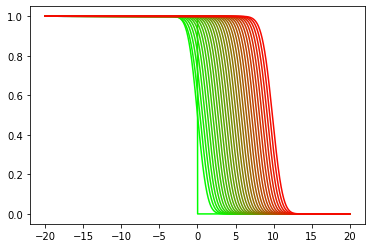

In [13]:
h = lambda x : np.heaviside(x, 1)
a = 0.3

ricker = lambda u : u * h(u-a) * np.exp(1-u)

model = ide(g = ricker,
            k = norm.pdf,
            xmin=-20, xmax=20, dx=0.01)
            
u0 = lambda x : h(-x)

model.set_initial_density(u0)

model.run(time_steps=30)

model.plot()

In [20]:
#def estimate_wavespeed(model, level, error):
wavefronts = [model.xmin + model.dx*max([i for i in range(len(model.seq[0])) if model.seq[j][i] > 0.1]) for j in range(len(model.seq))]
wavespeeds = [wavefronts[i+1]-wavefronts[i] for i in range(len(wavefronts)-1)]

In [35]:
averages = [np.max(wavespeeds[i:]-np.mean(wavespeeds[i:])) for i in range(len(model.seq)-1)]
averages = [c for c in averages if c < 0.01]
averages

[3.4416913763379853e-15,
 3.4416913763379853e-15,
 3.4416913763379853e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 3.3861802251067274e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [17]:
model.xmin

AttributeError: 'ide' object has no attribute 'xmin'